### Week-6 Exercise 6-2: Dimensionality Reduction and Feature Selection

##### Name: Nicolas Bolanos

#### Date: 07/2023

##### Part 1: PCA and Variance Threshold in a Linear Regression

1) Import the housing data as a data frame and ensure that the data is loaded properly

In [168]:
# Importing required libraries
import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [169]:
import os
os.getcwd()

'/Users/nico/Developer/DataScience/DSC-550/Summer_2023/Week_6'

In [170]:
ls

BolanosN_Week_6_Exercise_.ipynb
Week_6_Borrador_Special_calculation.ipynb
data_description.txt
train.csv


In [171]:
# Loading data from training dataset link 
# source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
df_houseP = pd.read_csv('train.csv')

In [172]:
# Returning the first 50 records
df_houseP.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [173]:
# Assessing number of variables from dataset
df_houseP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [174]:
print(df_houseP.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [175]:
df_houseP.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


2) Drop the "Id" column and any features that are missing more than 40% of their values

In [182]:
missing_Pcnet = df_houseP.isnull().sum() * 100/len(df_houseP)

val_missing_df = pd.DataFrame({'column_name': df_houseP.columns,
                              'missing_Pcnet':missing_Pcnet})
val_missing_df

,column_name,missing_Pcnet
Id,Id,0.000000
MSSubClass,MSSubClass,0.000000
MSZoning,MSZoning,0.000000
LotFrontage,LotFrontage,17.739726
LotArea,LotArea,0.000000
Street,Street,0.000000
Alley,Alley,93.767123
LotShape,LotShape,0.000000
LandContour,LandContour,0.000000
Utilities,Utilities,0.000000


In [183]:
df_houseP = df_houseP.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'] , axis=1)

In [185]:
# Total columns change from 81 to 75
df_houseP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [186]:
df_houseP.head(50)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


3) For numerical coluns, fill in any missing data with the median value

In [187]:
df_houseP.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [188]:
df_houseP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [189]:
# Understand which columns contain numerical values
numeric_columns_values = df_houseP.select_dtypes('number').columns
numeric_columns_values = list(set(numeric_columns_values))

In [190]:
# Displays a list of numeric columns in data
numeric_columns_values

['OverallCond',
 'OverallQual',
 '3SsnPorch',
 'YearRemodAdd',
 'KitchenAbvGr',
 'Fireplaces',
 'MoSold',
 '2ndFlrSF',
 '1stFlrSF',
 'GrLivArea',
 'LowQualFinSF',
 'YrSold',
 'LotArea',
 'PoolArea',
 'GarageArea',
 'BedroomAbvGr',
 'HalfBath',
 'SalePrice',
 'BsmtUnfSF',
 'GarageYrBlt',
 'WoodDeckSF',
 'ScreenPorch',
 'TotalBsmtSF',
 'EnclosedPorch',
 'MasVnrArea',
 'LotFrontage',
 'FullBath',
 'OpenPorchSF',
 'GarageCars',
 'BsmtFinSF1',
 'BsmtHalfBath',
 'MSSubClass',
 'TotRmsAbvGrd',
 'MiscVal',
 'BsmtFinSF2',
 'BsmtFullBath',
 'YearBuilt']

In [191]:
# Understanding the median value of previous columns
df_houseP.median()

/var/folders/by/kpnx55p96d37xc1678856fsw0000gn/T/ipykernel_15079/4065676162.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_houseP.median()


MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float64

In [192]:
# Filling in any missing data with the median value
df_houseP = df_houseP.fillna(df_houseP.median())

/var/folders/by/kpnx55p96d37xc1678856fsw0000gn/T/ipykernel_15079/2067122145.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_houseP = df_houseP.fillna(df_houseP.median())


In [193]:
df_houseP.head(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [194]:
df_houseP.tail(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1430,60,RL,60.0,21930,Pave,IR3,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,Unf,0,Unf,0,732,732,GasA,Ex,Y,SBrkr,734,1104,0,1838,0,0,2,1,4,1,TA,7,Typ,1,BuiltIn,2005.0,Fin,2,372,TA,TA,Y,100,40,0,0,0,0,0,7,2006,WD,Normal,192140
1431,120,RL,69.0,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,0,10,2009,WD,Normal,143750
1432,30,RL,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1927,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,656,656,GasA,TA,Y,SBrkr,968,0,0,968,0,0,2,0,4,1,TA,5,Typ,0,Detchd,1928.0,Unf,1,216,Fa,Fa,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,64500
1433,60,RL,93.0,10261,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,318.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,962,830,0,1792,1,0,2,1,3,1,TA,8,Typ,1,Attchd,2000.0,Fin,2,451,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal,186500
1434,20,RL,80.0,17400,Pave,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1977,1977,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,936,Unf,0,190,1126,GasA,Fa,Y,SBrkr,1126,0,0,1126,1,0,2,0,3,1,TA,5,Typ,1,Attchd,1977.0,RFn,2,484,TA,TA,P,295,41,0,0,0,0,0,5,2006,WD,Normal,160000
1435,20,RL,80.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,9,1962,2005,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,237.0,Gd,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,1319,1319,GasA,TA,Y,SBrkr,1537,0,0,1537,1,0,1,1,3,1,Gd,7,Typ,1,Attchd,1962.0,RFn,2,462,TA,TA,Y,0,36,0,0,0,0,0,7,2008,COD,Abnorml,174000
1436,20,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,616,Unf,0,248,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,Detchd,1974.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,0,5,2007,WD,Normal,120500
1437,20,RL,96.0,12444,Pave,Reg,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,426.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1336,Unf,0,596,1932,GasA,Ex,Y,SBrkr,1932,0,0,1932,1,0,2,0,2,1,Ex,7,Typ,1,Attchd,2008.0,Fin,3,774,TA,TA,Y,0,66,0,304,0,0,0,11,2008,New,Partial,394617
1438,20,RM,90.0,7407,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,6,7,1957,1996,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,600,Unf,0,312,912,GasA,TA,Y,FuseA,1236,0,0,1236,1,0,1,0,2,1,TA,6,Typ,0,Attchd,1957.0,Unf,2,923,TA,TA,Y,0,158,158,0,0,0,0,4,2010,WD,Normal,149700
1439,60,RL,80.0,11584,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,7,6,1979,1979,Hip,CompShg,HdBoard,HdBoard,BrkFace,96.0,TA,TA,CBlock,TA,TA,No,GLQ,315,Rec,110,114,539,GasA,TA,Y,SBrkr,1040,685,0,1725,0,0,2,1,3,1,TA,6,Typ,1,Attchd,1979.0,RFn,2,550,TA,TA,Y,0,88,216,0,0,0,0,11,2007,WD,Normal,197000


4) For categorical columns, fill in any missing data with the most common value(mode). 

In [195]:
categorical_columns_values = df_houseP.select_dtypes('object').columns
categorical_columns_values = list(set(categorical_columns_values))

In [196]:
categorical_columns_values

['BsmtFinType2',
 'Exterior2nd',
 'Condition1',
 'MSZoning',
 'BsmtQual',
 'Functional',
 'BsmtFinType1',
 'HeatingQC',
 'MasVnrType',
 'CentralAir',
 'Foundation',
 'Street',
 'RoofMatl',
 'Condition2',
 'GarageQual',
 'ExterQual',
 'HouseStyle',
 'Electrical',
 'ExterCond',
 'SaleType',
 'KitchenQual',
 'SaleCondition',
 'Neighborhood',
 'LotShape',
 'Heating',
 'LandContour',
 'GarageFinish',
 'BsmtExposure',
 'LotConfig',
 'Utilities',
 'LandSlope',
 'BldgType',
 'Exterior1st',
 'RoofStyle',
 'GarageType',
 'PavedDrive',
 'GarageCond',
 'BsmtCond']

In [197]:
# Applying the mode() function 
mode_one = df_houseP.mode()

In [198]:
mode_one

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,69.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2006,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,0,0,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,2,0,3,1,TA,6,Typ,0,Attchd,1980.0,Unf,2,0,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,140000


In [199]:
pd.options.display.max_columns = None

pd.options.display.max_rows = None

In [200]:
mode_one

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,69.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2006,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,0,0,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,2,0,3,1,TA,6,Typ,0,Attchd,1980.0,Unf,2,0,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,140000


In [201]:
# Filling missing categorical data with mode value
df_houseP['BsmtFinType2'] = df_houseP['BsmtFinType2'].fillna(df_houseP['BsmtFinType2'].mode()[0])
df_houseP['Exterior2nd'] = df_houseP['Exterior2nd'].fillna(df_houseP['Exterior2nd'].mode()[0])
df_houseP['Condition1'] = df_houseP['Condition1'].fillna(df_houseP['Condition1'].mode()[0])
df_houseP['MSZoning'] = df_houseP['MSZoning'].fillna(df_houseP['MSZoning'].mode()[0])
df_houseP['BsmtQual'] = df_houseP['BsmtQual'].fillna(df_houseP['BsmtQual'].mode()[0])
df_houseP['Functional'] = df_houseP['Functional'].fillna(df_houseP['Functional'].mode()[0])
df_houseP['BsmtFinType1'] = df_houseP['BsmtFinType1'].fillna(df_houseP['BsmtFinType1'].mode()[0])
df_houseP['HeatingQC'] = df_houseP['HeatingQC'].fillna(df_houseP['HeatingQC'].mode()[0])
df_houseP['MasVnrType'] = df_houseP['MasVnrType'].fillna(df_houseP['MasVnrType'].mode()[0])
df_houseP['CentralAir'] = df_houseP['CentralAir'].fillna(df_houseP['CentralAir'].mode()[0])
df_houseP['Foundation'] = df_houseP['Foundation'].fillna(df_houseP['Foundation'].mode()[0])
df_houseP['Street'] = df_houseP['Street'].fillna(df_houseP['Street'].mode()[0])
df_houseP['RoofMatl'] = df_houseP['RoofMatl'].fillna(df_houseP['RoofMatl'].mode()[0])
df_houseP['Condition2'] = df_houseP['Condition2'].fillna(df_houseP['Condition2'].mode()[0])
df_houseP['GarageQual'] = df_houseP['GarageQual'].fillna(df_houseP['GarageQual'].mode()[0])
df_houseP['ExterQual'] = df_houseP['ExterQual'].fillna(df_houseP['ExterQual'].mode()[0])
df_houseP['HouseStyle'] = df_houseP['HouseStyle'].fillna(df_houseP['HouseStyle'].mode()[0])
df_houseP['Electrical'] = df_houseP['Electrical'].fillna(df_houseP['Electrical'].mode()[0])
df_houseP['ExterCond'] = df_houseP['ExterCond'].fillna(df_houseP['ExterCond'].mode()[0])
df_houseP['SaleType'] = df_houseP['SaleType'].fillna(df_houseP['SaleType'].mode()[0])
df_houseP['KitchenQual'] = df_houseP['KitchenQual'].fillna(df_houseP['KitchenQual'].mode()[0])
df_houseP['SaleCondition'] = df_houseP['SaleCondition'].fillna(df_houseP['SaleCondition'].mode()[0])
df_houseP['Neighborhood'] = df_houseP['Neighborhood'].fillna(df_houseP['Neighborhood'].mode()[0])
df_houseP['LotShape'] = df_houseP['LotShape'].fillna(df_houseP['LotShape'].mode()[0])
df_houseP['Heating'] = df_houseP['Heating'].fillna(df_houseP['Heating'].mode()[0])
df_houseP['LandContour'] = df_houseP['LandContour'].fillna(df_houseP['LandContour'].mode()[0])
df_houseP['GarageFinish'] = df_houseP['GarageFinish'].fillna(df_houseP['GarageFinish'].mode()[0])
df_houseP['BsmtExposure'] = df_houseP['BsmtExposure'].fillna(df_houseP['BsmtExposure'].mode()[0])
df_houseP['LotConfig'] = df_houseP['LotConfig'].fillna(df_houseP['LotConfig'].mode()[0])
df_houseP['Utilities'] = df_houseP['Utilities'].fillna(df_houseP['Utilities'].mode()[0])
df_houseP['LandSlope'] = df_houseP['LandSlope'].fillna(df_houseP['LandSlope'].mode()[0])
df_houseP['BldgType'] = df_houseP['BldgType'].fillna(df_houseP['BldgType'].mode()[0])
df_houseP['Exterior1st'] = df_houseP['Exterior1st'].fillna(df_houseP['Exterior1st'].mode()[0])
df_houseP['RoofStyle'] = df_houseP['RoofStyle'].fillna(df_houseP['RoofStyle'].mode()[0])
df_houseP['GarageType'] = df_houseP['GarageType'].fillna(df_houseP['GarageType'].mode()[0])
df_houseP['PavedDrive'] = df_houseP['PavedDrive'].fillna(df_houseP['PavedDrive'].mode()[0])
df_houseP['GarageCond'] = df_houseP['GarageCond'].fillna(df_houseP['GarageCond'].mode()[0])
df_houseP['BsmtCond'] = df_houseP['BsmtCond'].fillna(df_houseP['BsmtCond'].mode()[0])

In [202]:
# looking into both df_houseP.info() vs. .shape to see total of columns in dataframe
df_houseP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [203]:
df_houseP.shape

(1460, 75)

In [204]:
df_houseP.head(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [205]:
df_houseP.tail(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1445,85,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187,Rec,627,0,814,GasA,Gd,Y,SBrkr,913,0,0,913,1,0,1,0,3,1,TA,6,Typ,0,Detchd,1990.0,Unf,1,240,TA,TA,Y,0,0,252,0,0,0,0,5,2007,WD,Normal,129000
1446,20,RL,69.0,26142,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1962,1962,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,Rec,593,Unf,0,595,1188,GasA,TA,Y,SBrkr,1188,0,0,1188,0,0,1,0,3,1,TA,6,Typ,0,Attchd,1962.0,Unf,1,312,TA,TA,P,261,39,0,0,0,0,0,4,2010,WD,Normal,157900
1447,60,RL,80.0,10000,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,438.0,Gd,TA,PConc,Gd,TA,No,GLQ,1079,Unf,0,141,1220,GasA,Ex,Y,SBrkr,1220,870,0,2090,1,0,2,1,3,1,Gd,8,Typ,1,Attchd,1995.0,RFn,2,556,TA,TA,Y,0,65,0,0,0,0,0,12,2007,WD,Normal,240000
1448,50,RL,70.0,11767,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,4,7,1910,2000,Gable,CompShg,MetalSd,HdBoard,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,560,560,GasA,Gd,N,SBrkr,796,550,0,1346,0,0,1,1,2,1,TA,6,Min2,0,Detchd,1950.0,Unf,1,384,Fa,TA,Y,168,24,0,0,0,0,0,5,2007,WD,Normal,112000
1449,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,Attchd,1980.0,Unf,0,0,TA,TA,Y,0,0,0,0,0,0,0,8,2006,WD,Abnorml,92000
1450,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,Attchd,1980.0,Unf,0,0,TA,TA,Y,32,45,0,0,0,0,0,9,2009,WD,Normal,136000
1451,20,RL,78.0,9262,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Attchd,2008.0,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,0,5,2009,New,Partial,287090
1452,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,0,5,2006,WD,Normal,145000
1453,20,RL,90.0,17217,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,Attchd,1980.0,Unf,0,0,TA,TA,Y,36,56,0,0,0,0,0,7,2006,WD,Abnorml,84500
1454,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,0,10,2009,WD,Normal,185000


5) Convert the categorical columns to dummy variables

In [206]:
# Listing number of categorical columns
categorical_columns_values

['BsmtFinType2',
 'Exterior2nd',
 'Condition1',
 'MSZoning',
 'BsmtQual',
 'Functional',
 'BsmtFinType1',
 'HeatingQC',
 'MasVnrType',
 'CentralAir',
 'Foundation',
 'Street',
 'RoofMatl',
 'Condition2',
 'GarageQual',
 'ExterQual',
 'HouseStyle',
 'Electrical',
 'ExterCond',
 'SaleType',
 'KitchenQual',
 'SaleCondition',
 'Neighborhood',
 'LotShape',
 'Heating',
 'LandContour',
 'GarageFinish',
 'BsmtExposure',
 'LotConfig',
 'Utilities',
 'LandSlope',
 'BldgType',
 'Exterior1st',
 'RoofStyle',
 'GarageType',
 'PavedDrive',
 'GarageCond',
 'BsmtCond']

In [207]:
# Dummy variables applying concat function to set logic. 
df_houseP = pd.concat([df_houseP.drop(['BsmtFinType2','Exterior2nd','Condition1','MSZoning','BsmtQual','Functional','BsmtFinType1','HeatingQC','MasVnrType','CentralAir','Foundation','Street','RoofMatl','Condition2','GarageQual','ExterQual','HouseStyle','Electrical','ExterCond','SaleType','KitchenQual','SaleCondition','Neighborhood','LotShape','Heating','LandContour','GarageFinish','BsmtExposure','LotConfig','Utilities','LandSlope','BldgType','Exterior1st','RoofStyle','GarageType','PavedDrive','GarageCond','BsmtCond'],axis=1),pd.get_dummies(df_houseP[['BsmtFinType2','Exterior2nd','Condition1','MSZoning','BsmtQual','Functional','BsmtFinType1','HeatingQC','MasVnrType','CentralAir','Foundation','Street','RoofMatl','Condition2','GarageQual','ExterQual','HouseStyle','Electrical','ExterCond','SaleType','KitchenQual','SaleCondition','Neighborhood','LotShape','Heating','LandContour','GarageFinish','BsmtExposure','LotConfig','Utilities','LandSlope','BldgType','Exterior1st','RoofStyle','GarageType','PavedDrive','GarageCond','BsmtCond']])],axis=1)

In [209]:
df_houseP.shape

(1460, 271)

In [210]:
# Checking columns 
df_houseP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 271 entries, MSSubClass to BsmtCond_TA
dtypes: float64(3), int64(34), uint8(234)
memory usage: 755.8 KB


In [211]:
df_houseP.head(15)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,CentralAir_N,CentralAir_Y,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Street_Grvl,Street_Pave,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Ro

In [212]:
df_houseP.tail(15)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,CentralAir_N,CentralAir_Y,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Street_Grvl,Street_Pave,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Ro

In [213]:
# Iterating through all columns to check names in df_houseP 
for names_cols in df_houseP.columns:
    print(names_cols)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
BsmtFinType2_ALQ
BsmtFinType2_BLQ
BsmtFinType2_GLQ
BsmtFinType2_LwQ
BsmtFinType2_Rec
BsmtFinType2_Unf
Exterior2nd_AsbShng
Exterior2nd_AsphShn
Exterior2nd_Brk Cmn
Exterior2nd_BrkFace
Exterior2nd_CBlock
Exterior2nd_CmentBd
Exterior2nd_HdBoard
Exterior2nd_ImStucc
Exterior2nd_MetalSd
Exterior2nd_Other
Exterior2nd_Plywood
Exterior2nd_Stone
Exterior2nd_Stucco
Exterior2nd_VinylSd
Exterior2nd_Wd Sdng
Exterior2nd_Wd Shng
Condition1_Artery
Condition1_Feedr
Condition1_Norm
Condition1_PosA
Condition1_PosN
Condition1_RRAe
Condition1_RRAn
Condition1_RRNe
Condition1_RRNn
MSZoning_C (all)
MSZoning_FV
MSZoni

6) Split data into a training and test set, where the SalePrice column is the target


In [214]:
# Process to split data into a Training and Test Set
X = df_houseP.drop(['SalePrice'],axis = 1)

# Process to get values from target
y = df_houseP['SalePrice']

# Process to Train data at 80% 
# Process to Test data at 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [215]:
# Resetting indices to avoid warnings 
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop = True)

y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [216]:
# Display sizes of both findings training and test sets
print(X_train.shape)

print(X_test.shape)

(1168, 270)
(292, 270)


In [217]:
# Analyze number of training and test sets which display positive for survival 
  # vs. negative for deaths results.
print(y_train.value_counts())

print(y_test.value_counts())

135000    16
140000    13
155000    13
190000    11
160000    11
110000    10
130000    10
139000    10
145000    10
185000     9
144000     8
127000     8
180000     8
100000     8
129000     8
115000     8
173000     7
143000     7
119000     7
170000     7
147000     7
175000     7
125000     7
165000     7
230000     7
215000     6
108000     6
112000     6
124000     6
148000     6
250000     6
158000     6
174000     6
235000     6
137500     6
141000     6
200000     6
118000     5
157000     5
154000     5
127500     5
132000     5
210000     5
133000     5
176000     5
120000     5
240000     5
275000     5
151000     5
260000     5
124500     4
156000     4
113000     4
189000     4
225000     4
192000     4
149000     4
152000     4
172500     4
220000     4
122000     4
178000     4
128000     4
214000     4
162000     4
187500     4
197000     4
88000      4
177000     4
118500     4
85000      4
168000     4
239000     4
119500     4
159000     4
181000     4
325000     4

In [218]:
# No Missing Data checkup
print(X_train.isna().sum())

print(X_test.isna().sum())

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
BsmtFinType2_ALQ         0
B

7) Run a linear regression and report the R2-value and RMSE on the test set. 

In [219]:
# Import Required Library
from sklearn.linear_model import LinearRegression

In [220]:
# Regression model to run
model_houseP = LinearRegression()

# Training model 
model_houseP.fit(X_train, y_train)

# Apply model to obtain predictions from test set
y_prediction_houseP = model_houseP.predict(X_test)

In [221]:
# Import Required Libraries for R2 and RMSE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from math import sqrt

In [222]:
# Display Results from prior operations

print('Root Mean Squared Error - RMSE is: ', sqrt(mean_squared_error(y_test, y_prediction_houseP)))

print('Coefficient of Determination - R2 is: ', r2_score(y_test, y_prediction_houseP))

Root Mean Squared Error - RMSE is:  47487.35387223338
Coefficient of Determination - R2 is:  0.7181920760499463


8) Fit and transform the training features with a PCA so that 90% of the variance is retained.

In [232]:
# Import Required Libraries 
# Reducing Features Using Principal Components
# Source: Machine Learning Text, Section 9.1
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [233]:
# Declaring variable for StandardScaler
standCaler_houseP = StandardScaler()

In [234]:
# Standardize the feature matrix
features_Xtrain_houseP =standCaler_houseP.fit_transform(X_train)

In [235]:
# Create a PCA that will retain 90% of the variance
pca_houseP = PCA(n_components=0.9, whiten=True)

In [236]:
# Conduct PCA
features_pca_Xtrain_houseP = pca_houseP.fit_transform(features_Xtrain_houseP)

9) How many features are in the PCA-transformed matrix?

In [238]:
# Number of features found in PCA-transformed matrix
print('Original number of features:', features_Xtrain_houseP.shape[1])

print('Reduced number of features: ', features_pca_Xtrain_houseP.shape[1])

Original number of features: 270
Reduced number of features:  138


10) Transform but DO NOT fit the test features with the same PCA

In [250]:
# Standardize the feature matrix
test_features_houseP = standCaler_houseP.transform(X_test)

In [251]:
# Conduct Principar Component Analysis
test_features_houseP_pca = pca_houseP.transform(test_features_houseP)

11) Repeat step 7 with your PCA transformed data. 

In [252]:
# Import Required Library
from sklearn.linear_model import LinearRegression

In [253]:
# Regression model to run
model_houseP = LinearRegression()

# Training model 
model_houseP.fit(features_pca_Xtrain_houseP, y_train)

# Apply model to obtain predictions from test set
y_prediction_houseP_PCA = model_houseP.predict(test_features_houseP_pca)

In [254]:
# Import Required Libraries for R2 and RMSE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from math import sqrt

In [255]:
# Display Results from prior operations

print('Root Mean Squared Error - RMSE is: ', sqrt(mean_squared_error(y_test, y_prediction_houseP_PCA)))

print('Coefficient of Determination - R2 is: ', r2_score(y_test, y_prediction_houseP_PCA))

Root Mean Squared Error - RMSE is:  44571.91743102564
Coefficient of Determination - R2 is:  0.751732486351292


12) Take your original training features from step 6 and apply a min-max scaler to them

In [256]:
# Import Required Library
from sklearn import preprocessing

In [257]:
# Generate a scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

In [259]:
# Scale feature from training in step 6
scaled_feature = minmax_scale.fit_transform(X_train)

In [263]:
# Display results from feature
scaled_feature

array([[0.23529412, 0.25684932, 0.04677838, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.16438356, 0.04589965, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.21917808, 0.05749141, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.41176471, 0.17465753, 0.04430111, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.27054795, 0.05632289, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.0890411 , 0.05195728, ..., 0.        , 0.        ,
        0.        ]])

13. Find the min-max scaled features in your training set that have a variance above 0.1

In [265]:
# Import Required Libraries
from sklearn.feature_selection import VarianceThreshold

In [266]:
# Generate thresholder
thresholder = VarianceThreshold(threshold=0.1)

In [267]:
# Generate High Variance Feature Matrix
# scaled_feature variable contains the X_train feature from steps above
features_high_variance = thresholder.fit_transform(scaled_feature)

In [268]:
# View high variance features matrix
features_high_variance[0:3]

array([[0.96666667, 0.75      , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ],
       [0.56666667, 0.5       , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1. 

14) Transform but Do Not fit the test features with the same steps applied in steps 11 and 12

In [269]:
# Declare Test Scale Feature 
test_scaled_feature=minmax_scale.transform(X_test)

In [270]:
# Display feature results
test_scaled_feature

array([[0.        , 0.27054795, 0.09558531, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.16438356, 0.06292271, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.05136986, 0.0664797 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.17647059, 0.13356164, 0.04019725, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.04109589, 0.01475145, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.18493151, 0.03599056, ..., 0.        , 0.        ,
        1.        ]])

In [271]:
# Generate High Variance Feature Matrix
test_features_high_variance = thresholder.transform(test_scaled_feature)

In [272]:
# Display High Variance Feature Matrix Results
test_features_high_variance[0:3]

array([[0.06666667, 0.5       , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1. 

15) Repeat step 7 with the high variance data

In [273]:
# Import Required Library
from sklearn.linear_model import LinearRegression

In [274]:
# Regression model to run
model_houseP = LinearRegression()

# Training model 
model_houseP.fit(features_high_variance, y_train)

# Apply model to obtain predictions from test set
y_prediction_MinMax = model_houseP.predict(test_features_high_variance)

In [275]:
# Import Required Libraries for R2 and RMSE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from math import sqrt

In [276]:
# Display Results from prior operations

print('Root Mean Squared Error - RMSE is: ', sqrt(mean_squared_error(y_test, y_prediction_MinMax)))

print('Coefficient of Determination - R2 is: ', r2_score(y_test, y_prediction_MinMax))

Root Mean Squared Error - RMSE is:  57335.68888198622
Coefficient of Determination - R2 is:  0.5891840186139082


16) Summarize your findings

The results presented from the Principal Component Analysis or PCA were low or less close to real values compared to the results from Linear Regression's R2 which were higher and closer to 0 and 1. This proofs that a Linear Regression model tends to be closer to real numbers or high in value. 

##### Part 2: Categorical Feature Selection

In [280]:
import os

os.getcwd()

'/Users/nico/Developer/DataScience/DSC-550/Summer_2023/Week_6'

In [281]:
ls

BolanosN_Week_6_Exercise_.ipynb
Week_6_Borrador_Special_calculation.ipynb
data_description.txt
mushrooms.csv
train.csv


1) Import the data as a data frame and ensure it is loaded correctly.

In [299]:
# Loading data from training dataset link 
# source: https://www.kaggle.com/datasets/uciml/mushroom-classification
df_mushroom_one = pd.read_csv('mushrooms.csv')

In [300]:
pd.options.display.max_columns = None

pd.options.display.max_rows = None

df_mushroom_one.head(30)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [301]:
# Looking into structure of data frame
df_mushroom_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

2) Convert the categorical features(all of them) to dummy variables

In [302]:
# Incorporating a new column Binary_Class_Format to manipulate 'p', 'e' values.
df_mushroom_one['Binary_Class_Format'] = df_mushroom_one['class'].replace(to_replace=['p','e'], value=[1,0])

In [303]:
# Displaying new column
df_mushroom_one.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Binary_Class_Format
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,0
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g,0
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m,0
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m,0
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g,1
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m,0


In [304]:
# New Info displayed
df_mushroom_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [305]:
# Converting categorical columns 
category_Columns_mush_one = df_mushroom_one.select_dtypes('object').columns
category_Columns_mush_one = list(set(category_Columns_mush_one))

In [306]:
category_Columns_mush_one

['stalk-color-above-ring',
 'class',
 'spore-print-color',
 'cap-shape',
 'habitat',
 'stalk-surface-above-ring',
 'gill-color',
 'stalk-color-below-ring',
 'stalk-shape',
 'cap-color',
 'odor',
 'veil-type',
 'population',
 'gill-attachment',
 'bruises',
 'ring-type',
 'ring-number',
 'cap-surface',
 'veil-color',
 'gill-size',
 'gill-spacing',
 'stalk-root',
 'stalk-surface-below-ring']

In [307]:
# Converting to dummy variables
df_mushroom_one = pd.concat([df_mushroom_one.drop(['stalk-color-above-ring','class','spore-print-color','cap-shape','habitat','stalk-surface-above-ring','gill-color','stalk-color-below-ring','stalk-shape','cap-color','odor','veil-type','population','gill-attachment','bruises','ring-type','ring-number','cap-surface','veil-color','gill-size','gill-spacing','stalk-root','stalk-surface-below-ring'],axis=1),pd.get_dummies(df_mushroom_one[['stalk-color-above-ring','class','spore-print-color','cap-shape','habitat','stalk-surface-above-ring','gill-color','stalk-color-below-ring','stalk-shape','cap-color','odor','veil-type','population','gill-attachment','bruises','ring-type','ring-number','cap-surface','veil-color','gill-size','gill-spacing','stalk-root','stalk-surface-below-ring']])],axis=1)

In [308]:
# Displaying all dimensions of data frame
df_mushroom_one.shape

(8124, 120)

In [309]:
# Checking first 15 records
df_mushroom_one.head(15)

,Binary_Class_Format,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,class_e,class_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,stalk-shape_e,stalk-shape_t,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,veil-type_p,population_a,population_c,population_n,population_s,population_v,population_y,gill-attachment_a,gill-attachment_f,bruises_f,bruises_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,ring-number_n,ring-number_o,ring-number_t,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,gill-size_b,gill-size_n,gill-spacing_c,gill-spacing_w,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
5,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1

3) Split the data into a training and test set

In [311]:
# X_mushroon_one contains split data 
X_mushroom_one = df_mushroom_one.drop(['Binary_Class_Format','class_e','class_p'], axis=1)

# y_mushroon_one contains target 
y_mushroom_one = df_mushroom_one['Binary_Class_Format']

# Split of data between Test set at 80% 
# Split of data between training set at 20%
X_mushroon_train_one, X_mushroom_test_one, y_train_mushrook_one, y_test_mushroom_one = train_test_split(X_mushroom_one, y_mushroom_one,test_size = 0.2, random_state=1)

In [312]:
# Disabling Pandas' slicing warnings
X_mushroon_train_one = X_mushroon_train_one.reset_index(drop=True)

X_mushroom_test_one = X_mushroom_test_one.reset_index(drop=True)

y_train_mushrook_one = y_train_mushrook_one.reset_index(drop=True)

y_test_mushroom_one = y_test_mushroom_one.reset_index(drop=True)


4) Fit a decision tree classifier on the training set

In [314]:
# Import Required Libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [315]:
# Decision Tree Classifier training process
Tclassifier_model = DecisionTreeClassifier()

# Incorporating Decision Tree Model into the training material
Tclassifier_model.fit(X_mushroon_train_one, y_train_mushrook_one)

# Predicting Test dependent variables
y_prediction_mushroom_one = Tclassifier_model.predict(X_mushroom_test_one)

5. Report the accuracy and create a confusion matrix for the model prediction on the test set

In [316]:
# Import Required Visualization Libraries
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [322]:
# Generate model accuracy and confusion matrix

# Incorporate class_labels for confusion matrix
# classes: (p = 1) and (e = 0)
label_encoder = {0:'Edible', 1:'Poisonous'}

The Model Accuracy is: 100.0%


/Users/nico/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


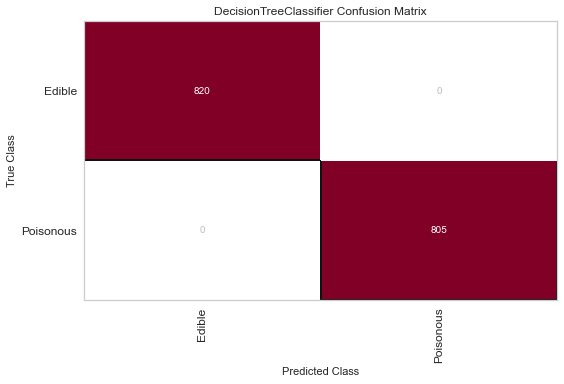

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [323]:
# Incorporate Confusion Matrix
conf_matrix_one = ConfusionMatrix(Tclassifier_model, encoder = label_encoder, percent=False)

# Fitting the test set to Confusion Matrix
conf_matrix_one.fit(X_mushroom_test_one, y_test_mushroom_one)

# Deploying Confusion Matrix to get accuracy
model_accuracy_result = 100 * conf_matrix_one.score(X_mushroom_test_one, y_test_mushroom_one)
print('The Model Accuracy is: ', round(model_accuracy_result,2), '%', sep='')

# Format font-size in visualization
for label in conf_matrix_one.ax.texts:
    label.set_size(10)
    
# Show Graph
conf_matrix_one.show()

6. Create a visualization of the decision tree

In [325]:
# Listing variables for features
feature_names_one = list(df_mushroom_one.drop(['Binary_Class_Format'], axis = 1).columns)

In [327]:
feature_names_one

['stalk-color-above-ring_b',
 'stalk-color-above-ring_c',
 'stalk-color-above-ring_e',
 'stalk-color-above-ring_g',
 'stalk-color-above-ring_n',
 'stalk-color-above-ring_o',
 'stalk-color-above-ring_p',
 'stalk-color-above-ring_w',
 'stalk-color-above-ring_y',
 'class_e',
 'class_p',
 'spore-print-color_b',
 'spore-print-color_h',
 'spore-print-color_k',
 'spore-print-color_n',
 'spore-print-color_o',
 'spore-print-color_r',
 'spore-print-color_u',
 'spore-print-color_w',
 'spore-print-color_y',
 'cap-shape_b',
 'cap-shape_c',
 'cap-shape_f',
 'cap-shape_k',
 'cap-shape_s',
 'cap-shape_x',
 'habitat_d',
 'habitat_g',
 'habitat_l',
 'habitat_m',
 'habitat_p',
 'habitat_u',
 'habitat_w',
 'stalk-surface-above-ring_f',
 'stalk-surface-above-ring_k',
 'stalk-surface-above-ring_s',
 'stalk-surface-above-ring_y',
 'gill-color_b',
 'gill-color_e',
 'gill-color_g',
 'gill-color_h',
 'gill-color_k',
 'gill-color_n',
 'gill-color_o',
 'gill-color_p',
 'gill-color_r',
 'gill-color_u',
 'gill-colo

In [330]:
# Decision Tree Classifier Training Model
Tclassifier_model = DecisionTreeClassifier()

# Fitting variables
Tclassifier_model.fit(X_mushroon_train_one,y_train_mushrook_one)

DecisionTreeClassifier()

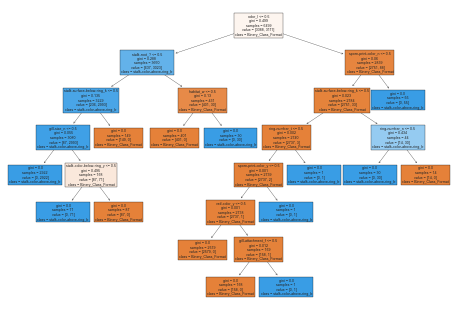

In [334]:
# Import sklearn tree 

from sklearn import tree as t

feature_names = list(df_mushroom_one.drop(['Binary_Class_Format'], axis=1).columns)

target_names = [str(s) for s in df_mushroom_one]

tree= t.plot_tree(Tclassifier_model, filled=True, feature_names= feature_names, class_names=target_names)

7) Use a x2-Static selector to pick the five best features for this data

In [335]:
# Source: 10.4 of The Machine Learning with Python Cookbook

# Import Required Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [336]:
# Generate target / feature list
features = X_mushroon_train_one

target = y_train_mushrook_one

In [337]:
# Converting Categorical data into integers 
features = features.astype(int)

In [338]:
# Select Five features with hightest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5)

features_kbest = chi2_selector.fit_transform(features, target)

In [339]:
# Display Results 
print('Original Number of Features: ', features.shape[1])

print('reduced number of features: ', features_kbest.shape[1])

Original Number of Features:  117
reduced number of features:  5


8. Which Five features were selected in step 7? 

In [341]:
#Source: get_support function

columns_mush_one = chi2_selector.get_support(indices=True)

features_df_new = features.iloc[:, columns_mush_one]

features_df_new

,stalk-surface-above-ring_k,gill-color_b,odor_f,odor_n,stalk-surface-below-ring_k
0,0,0,0,1,0
1,0,0,0,1,0
2,1,1,0,0,1
3,1,1,0,0,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,1,1,0,0,1
9,0,0,0,1,0


In [342]:
# Display new shape of data frame
features_df_new.shape

(6499, 5)

9) Repeat steps 4 and 5 with the five best features selected in step 7

In [345]:
# Splitting data into training and test sets
X_mushroom_chi_one= df_mushroom_one[['stalk-surface-above-ring_k','gill-color_b','odor_f','odor_n','stalk-surface-below-ring_k']]

# Use the target per y variable
y_mushroom_chi_one= df_mushroom_one['Binary_Class_Format']

In [346]:
# Training set = 80% 
# Test Set = 20%

X_mushroom_train_chi, X_mushroom_test_chi, y_mushroom_train_chi, y_mushroom_test_chi = train_test_split(X_mushroom_chi_one, y_mushroom_chi_one, test_size=0.2)

In [347]:
# Disabling Pandas' slicing warnings

X_mushroom_train_chi = X_mushroom_train_chi.reset_index(drop = True)

X_mushroom_test_chi = X_mushroom_test_chi.reset_index(drop = True)

y_mushroom_train_chi = y_mushroom_train_chi.reset_index(drop = True)

y_mushroom_test_chi = y_mushroom_test_chi.reset_index(drop = True)


In [349]:
# Decision Tree Classifier 
Tclassifier_model_NewFive = DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=3, min_samples_leaf=5)
Tclassifier_model_NewFive.fit(X_mushroom_train_chi, y_mushroom_train_chi)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

The Model Accuracy is: 90.89%


/Users/nico/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


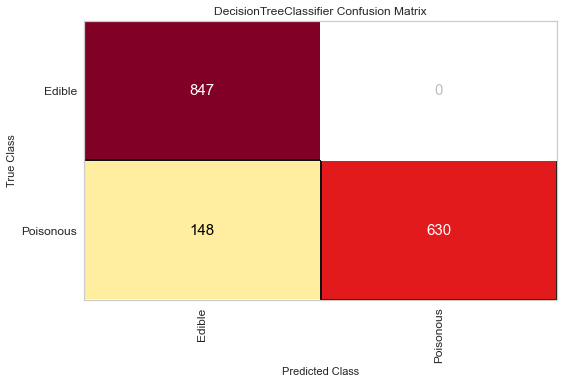

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [350]:
# Generate Class Labels to Display confusion Matrix
label_encoder = {0: 'Edible', 1:'Poisonous'}

# Declare and Initializer Confusion Matrix
Confx_one = ConfusionMatrix(Tclassifier_model_NewFive, encoder = label_encoder, percent=False)

# Fitting a Test Set into Confusion Matrix
Confx_one.fit(X_mushroom_test_chi, y_mushroom_test_chi)

# Generates Confusion Matrix to obtain accuracy
mode_accurax_chi_one = 100*Confx_one.score(X_mushroom_test_chi, y_mushroom_test_chi)
print('The Model Accuracy is: ',round(mode_accurax_chi_one,2), '%',sep='')

# For loop to format size and labels
for label in Confx_one.ax.texts:
    label.set_size(15)
    
# Display Matrix
Confx_one.show()

10) Summarize your findings

It looks like the first decision tree classifier reports more accuracy than the second one with only five features. It's a bout a 10 percent difference.